Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost

Пути к директориям и файлам

In [2]:
# input
DATASET_PATH = '../DS2/course_project_train.csv'

# output
TEST_DATASET_PATH = '../DS2/course_project_test.csv'

# для подготовленных данных
PREP_DATASET_PATH = '../DS2/course_project_train_prep.csv'

PREP_TEST_DATASET_PATH = '../DS2/course_project_test_prep.csv'

##Загрузка данных

Построение модели классификации

Обзор обучающего датасета

In [3]:
df = pd.read_csv(DATASET_PATH)
#train = pd.read_csv(DATASET_PATH)
test = pd.read_csv(TEST_DATASET_PATH)
test_df=test
print("Поехали, загрузка успешна!")


Поехали, загрузка успешна!


In [4]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df.shape

(7500, 17)

In [6]:
df.iloc[0]

Home Ownership                            Own Home
Annual Income                             482087.0
Years in current job                           NaN
Tax Liens                                      0.0
Number of Open Accounts                       11.0
Years of Credit History                       26.3
Maximum Open Credit                       685960.0
Number of Credit Problems                      1.0
Months since last delinquent                   NaN
Bankruptcies                                   1.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                     99999999.0
Current Credit Balance                     47386.0
Monthly Debt                                7914.0
Credit Score                                 749.0
Credit Default                                   0
Name: 0, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [8]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


Обзор целевой переменной

In [9]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [10]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [11]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [12]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

In [13]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


Обработка пропусков

In [14]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [15]:
df['Annual Income'].value_counts()

1043651.0    4
1161660.0    4
1338113.0    4
969475.0     4
1058376.0    4
            ..
2185646.0    1
2326075.0    1
330429.0     1
1704965.0    1
648166.0     1
Name: Annual Income, Length: 5478, dtype: int64

In [16]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [17]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [18]:
df['Credit Score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
742.0     151
         ... 
629.0       1
606.0       1
6830.0      1
6670.0      1
620.0       1
Name: Credit Score, Length: 268, dtype: int64

In [19]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [20]:
# Преобразуем 
def optimizingId_df(df):
#     df['Term_Long'] = df['Term'].map({'Long Term':'1', 'Short Term':'0'}).astype(int)
    # Annual Income
    df.loc[df['Annual Income'].isnull(), 'Annual Income'] = df['Annual Income'].median()
    #
    df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 120

    df['Years in current job']=df['Years in current job'].replace({'10+ years':15, '2 years':2,'3 years':3,'< 1 year':0,'5 years':5,
                                                                             '1 year':1,'4 years':4,'6 years':6,'7 years':7,'8 years':8,'9 years':9})
    df.loc[df['Years in current job'].isnull(), 'Years in current job'] = df['Years in current job'].median()
    
    df.loc[df['Bankruptcies'].isnull(), 'Bankruptcies'] = df['Bankruptcies'].median()
    df.loc[df['Credit Score'].isnull(), 'Credit Score'] = df['Credit Score'].median()
    
    for cat_colname in df.select_dtypes(include='object').columns[0:]:
        print(cat_colname)
        df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
    
    df.drop(['Home Ownership'],axis=1,inplace= True)
    df.drop(['Term'],axis=1,inplace= True)
    df.drop(['Purpose'],axis=1,inplace= True)
#     df.drop(['Term_Long Term'],axis=1,inplace= True)
#     df.drop(['Term_Short Term'],axis=1,inplace= True)
   
    return df;
        
# пройдемся по двум чтобы не забыть
df=optimizingId_df(df)
df.drop(['Purpose_renewable energy'],axis=1,inplace= True)

test=optimizingId_df(test)
# test['Purpose_renewable energy']=0
# test.nlargest(10, 'Purpose_renewable energy')

Home Ownership
Purpose
Term
Home Ownership
Purpose
Term


In [21]:
len(df) - df.count()

Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Home Ownership_Have Mortgage    0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_business loan           0
Purpose_buy a car               0
Purpose_buy house               0
Purpose_debt consolidation      0
Purpose_educational expenses    0
Purpose_home improvements       0
Purpose_major purchase          0
Purpose_medical bills           0
Purpose_moving                  0
Purpose_other                   0
Purpose_small business          0
Purpose_take a

In [22]:
len(test) - test.count()

Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Home Ownership_Have Mortgage    0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_business loan           0
Purpose_buy a car               0
Purpose_buy house               0
Purpose_debt consolidation      0
Purpose_educational expenses    0
Purpose_home improvements       0
Purpose_major purchase          0
Purpose_medical bills           0
Purpose_moving                  0
Purpose_other                   0
Purpose_small business          0
Purpose_take a trip             0
Purpose_vacati

In [23]:
df.shape

(7500, 34)

In [24]:
test.shape

(2500, 33)

In [25]:
len(df) - df.count()

Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Home Ownership_Have Mortgage    0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_business loan           0
Purpose_buy a car               0
Purpose_buy house               0
Purpose_debt consolidation      0
Purpose_educational expenses    0
Purpose_home improvements       0
Purpose_major purchase          0
Purpose_medical bills           0
Purpose_moving                  0
Purpose_other                   0
Purpose_small business          0
Purpose_take a

In [26]:
# функция оптимизации
def optimizing_memory_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
    return df
df=optimizing_memory_df(df)
test=optimizing_memory_df(test)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 7500 non-null   float32
 1   Years in current job          7500 non-null   float32
 2   Tax Liens                     7500 non-null   float32
 3   Number of Open Accounts       7500 non-null   float32
 4   Years of Credit History       7500 non-null   float32
 5   Maximum Open Credit           7500 non-null   float32
 6   Number of Credit Problems     7500 non-null   float32
 7   Months since last delinquent  7500 non-null   float32
 8   Bankruptcies                  7500 non-null   float32
 9   Current Loan Amount           7500 non-null   float32
 10  Current Credit Balance        7500 non-null   float32
 11  Monthly Debt                  7500 non-null   float32
 12  Credit Score                  7500 non-null   float32
 13  Cre

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 2500 non-null   float32
 1   Years in current job          2500 non-null   float32
 2   Tax Liens                     2500 non-null   float32
 3   Number of Open Accounts       2500 non-null   float32
 4   Years of Credit History       2500 non-null   float32
 5   Maximum Open Credit           2500 non-null   float32
 6   Number of Credit Problems     2500 non-null   float32
 7   Months since last delinquent  2500 non-null   float32
 8   Bankruptcies                  2500 non-null   float32
 9   Current Loan Amount           2500 non-null   float32
 10  Current Credit Balance        2500 non-null   float32
 11  Monthly Debt                  2500 non-null   float32
 12  Credit Score                  2500 non-null   float32
 13  Hom

In [29]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')
test.to_csv(PREP_TEST_DATASET_PATH, index=False, encoding='utf-8')

In [30]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [31]:

TARGET_NAME = 'Credit Default'
# df_base = pd.read_csv(DATASET_PATH)
# df = pd.read_csv(PREP_DATASET_PATH)

df.head()


,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087.0,6.0,0.0,11.0,26.299999,685960.0,1.0,120.0,1.0,100000000.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,15.0,0.0,15.0,15.300000,1181730.0,0.0,120.0,0.0,264968.0,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,8.0,0.0,11.0,35.000000,1182434.0,0.0,120.0,0.0,100000000.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,6.0,0.0,8.0,22.500000,147400.0,1.0,120.0,1.0,121396.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,8.0,0.0,13.0,13.600000,385836.0,1.0,120.0,0.0,125840.0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

Анализ целевой переменной

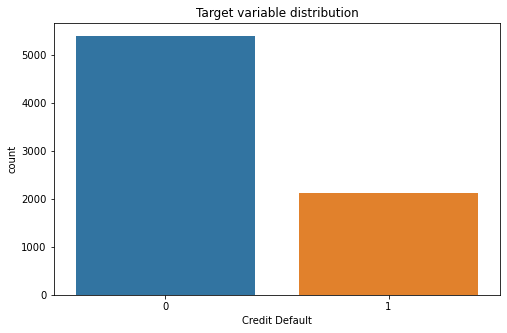

In [33]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

Корреляция с базовыми признаками

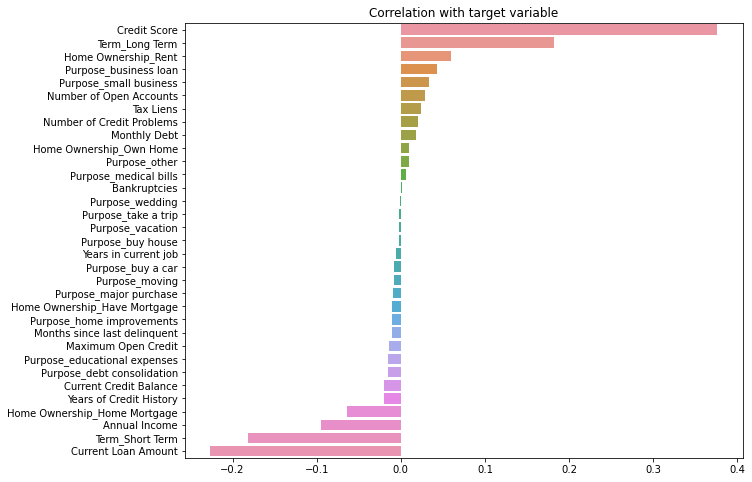

In [34]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Оценка признака "Years of Credit History" в разрезе целевой переменной

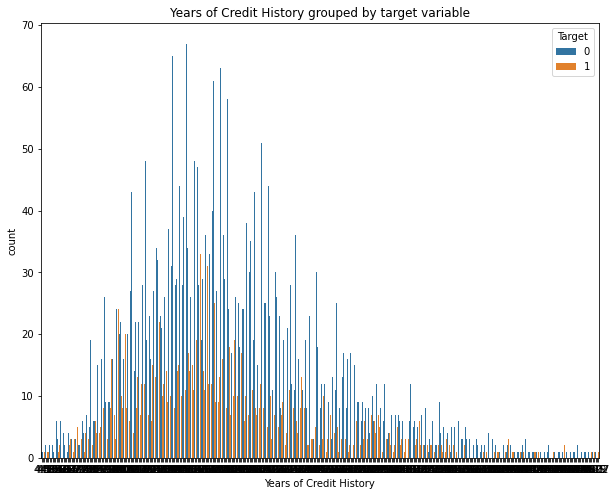

In [35]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years of Credit History", hue=TARGET_NAME, data=df)
plt.title('Years of Credit History grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Наблюдение

Изучив получившийся график, видно, что значения -1 (погашен полностью) и 0 (погашен частично) признака Years of Credit History имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно будет, например, объединить их в одну категорию.

Гипотеза

Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
Критерий: Хи-квадрат Пирсона
Уровень значимости  𝛼 : 0.05
Критическая область: двухсторонняя
Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий -1 и 0 признака Years of Credit History в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

Сформируем выборку и рассчитаем наблюдаемые частоты

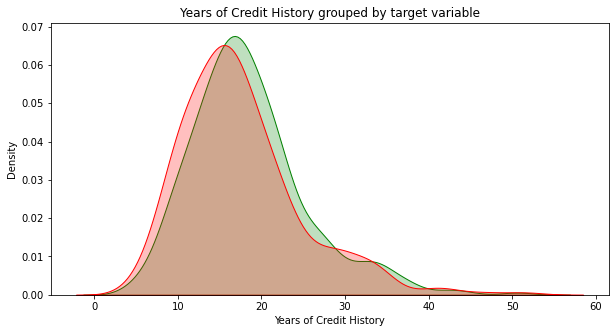

In [36]:
years_with_target_s = df[['Years of Credit History', TARGET_NAME]].sample(1000)
years_s = years_with_target_s['Years of Credit History']
years_target_0 = years_s[years_with_target_s[TARGET_NAME] == 0]
years_target_1 = years_s[years_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(years_target_0, shade=True, label='No default', color='g')
sns.kdeplot(years_target_1, shade=True, label='Default', color='r')

plt.xlabel('Years of Credit History')
plt.title('Years of Credit History grouped by target variable')
plt.show()


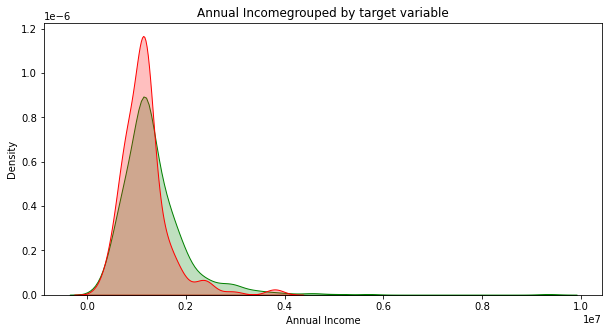

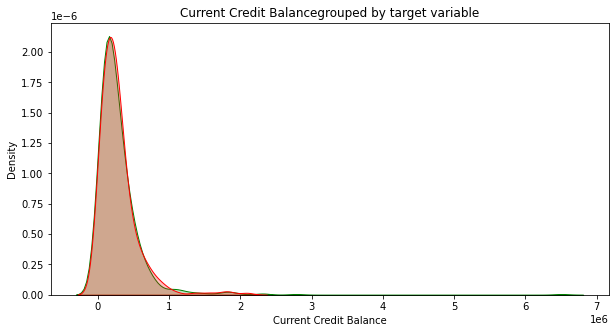

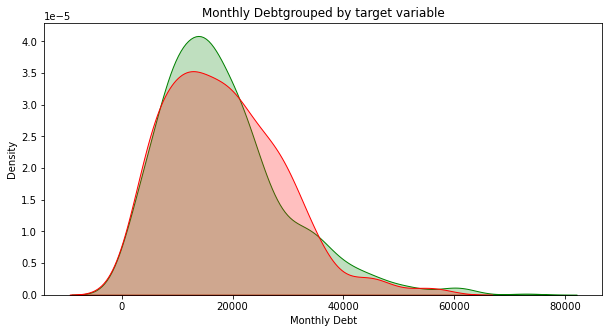

In [37]:
def get_plot(name_metrics):
    metric_target_s = df[[name_metrics, TARGET_NAME]].sample(1000)
    data_metric = metric_target_s[name_metrics]
    target_0 = data_metric[metric_target_s[TARGET_NAME] == 0]
    target_1 = data_metric[metric_target_s[TARGET_NAME] == 1]

    plt.figure(figsize=(10, 5))

    sns.kdeplot(target_0, shade=True, label='No default', color='g')
    sns.kdeplot(target_1, shade=True, label='Default', color='r')

    plt.xlabel(name_metrics)
    plt.title(name_metrics + 'grouped by target variable')
    plt.show()
    

get_plot('Annual Income')
get_plot( 'Current Credit Balance')
get_plot( 'Monthly Debt')



Наблюдение

Похоже что две группы, полученные в результате разбиения признака "Years of Credit History" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "Years of Credit History" и целевой переменной, возможно, существует некоторая функциональная зависимость.

Гипотеза

Нулевая гипотеза: средние значения в двух независимых выборках равны
Альтернативная гипотеза: средние значения в двух независимых выборках различаются
Критерий: критерий Стьюдента (t-тест) и его аналоги
Уровень значимости  𝛼 : 0.05
Критическая область: двухсторонняя
Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений. Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка

In [38]:
shapiro(years_s)

ShapiroResult(statistic=0.9371932148933411, pvalue=4.0797232820060095e-20)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график

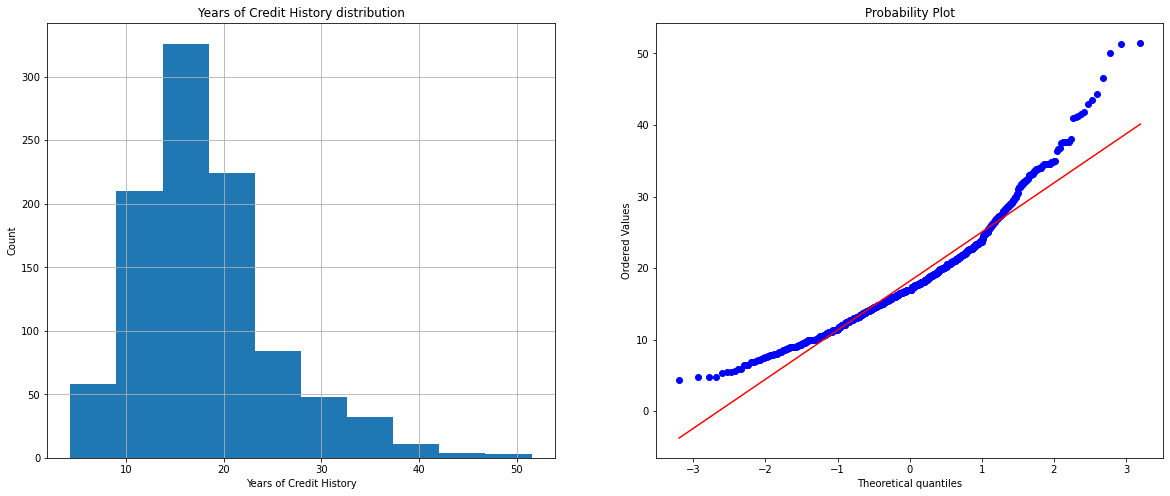

In [39]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Years of Credit History')
ax1.set_ylabel('Count')
ax1.set_title('Years of Credit History distribution')
years_s.hist()

plt.subplot(122)
probplot(years_s, dist='norm', plot=plt)

plt.show()

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни

In [40]:
mannwhitneyu(years_target_0, years_target_1)

MannwhitneyuResult(statistic=92992.5, pvalue=0.004758199501783745)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их

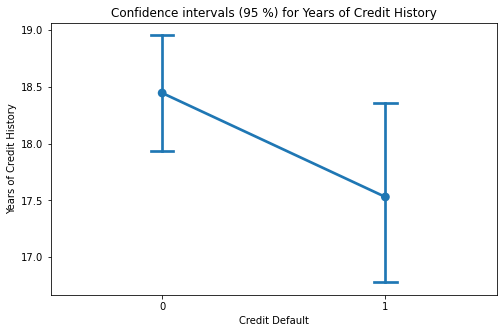

In [41]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Years of Credit History', data=years_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Years of Credit History')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

Анализ признакового пространства
Матрица корреляций

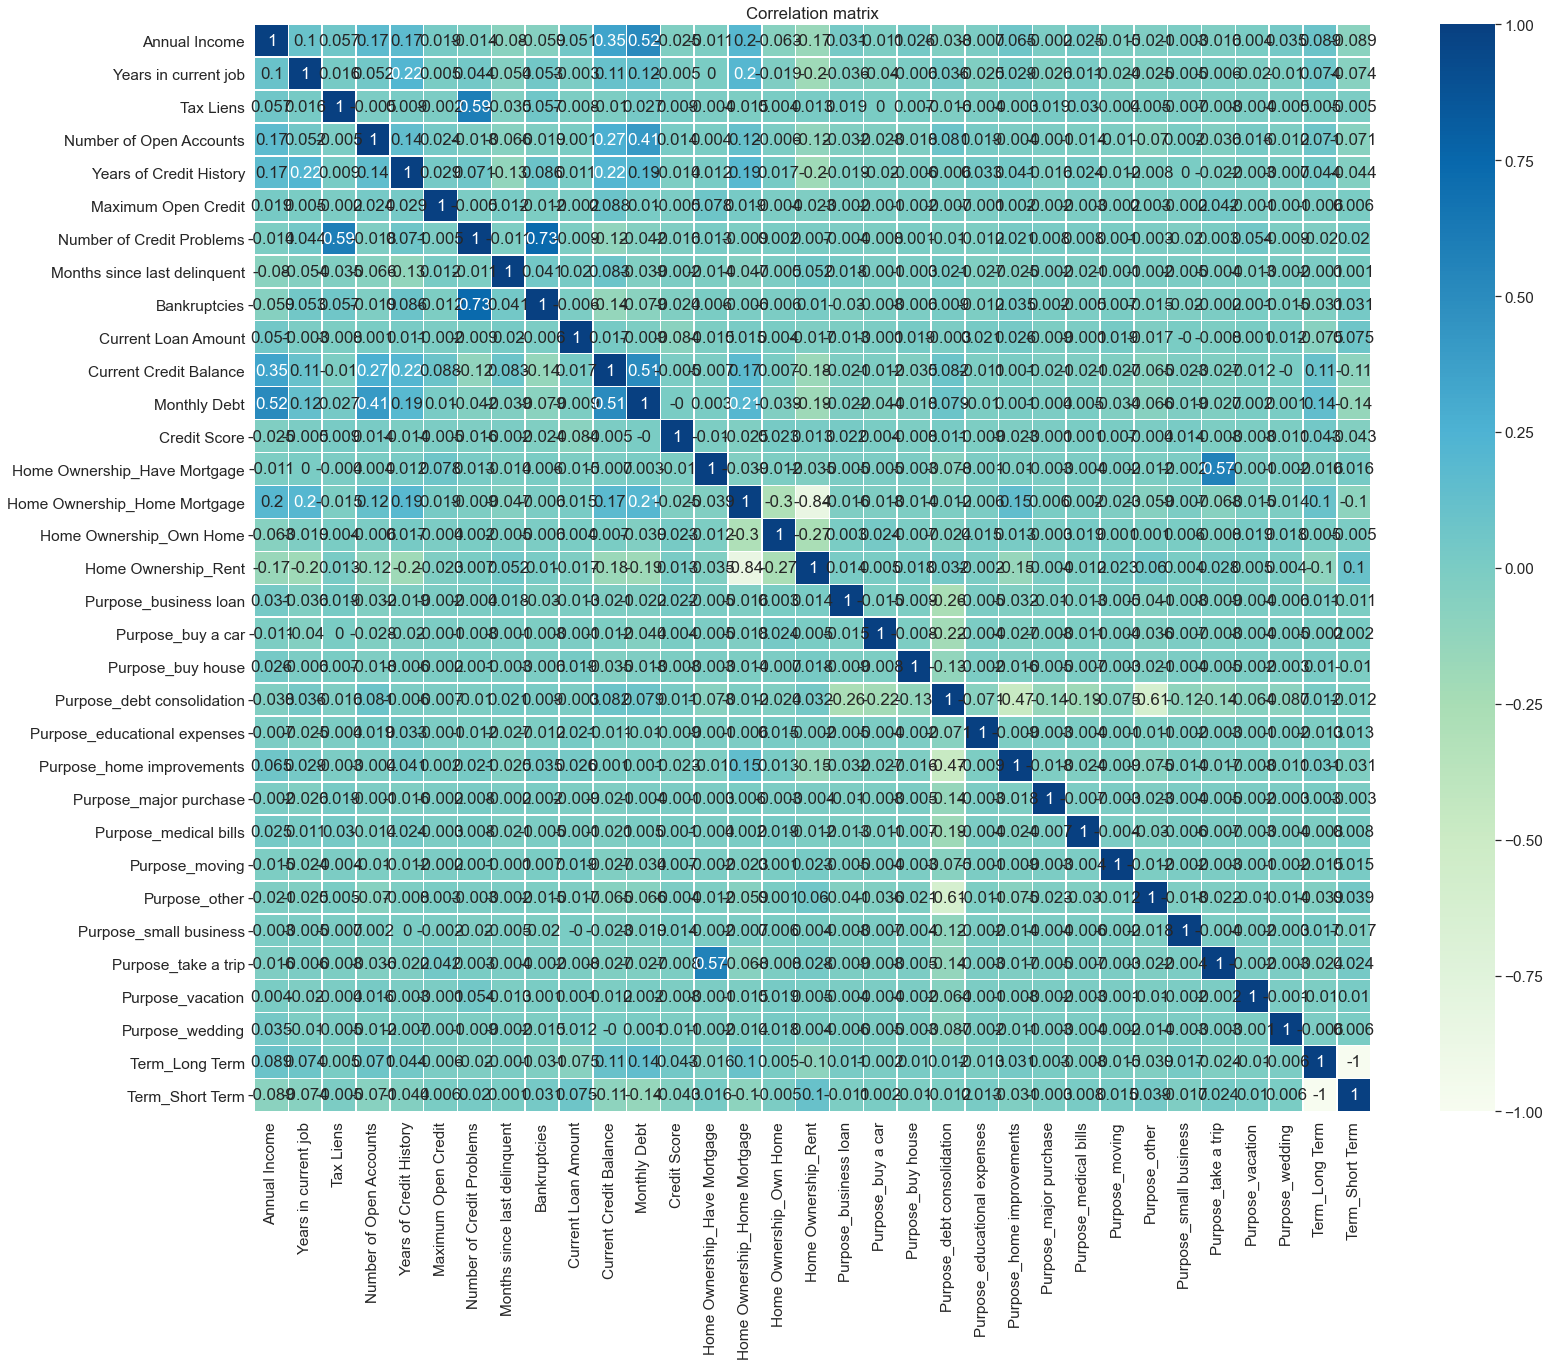

In [42]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [43]:
import pickle
import random
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [44]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [45]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [46]:
# output
TRAIN_FULL_PATH = '../DS2/training_project_train_full.csv'
TRAIN_PART_PATH = '../DS2/training_project_train_part_b.csv'
TEST_PART_PATH = '../DS2/training_project_test_part.csv'

SCALER_FILE_PATH = '../DS2/scaler.pkl'

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [48]:
df.head()


,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087.0,6.0,0.0,11.0,26.299999,685960.0,1.0,120.0,1.0,100000000.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,15.0,0.0,15.0,15.300000,1181730.0,0.0,120.0,0.0,264968.0,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,8.0,0.0,11.0,35.000000,1182434.0,0.0,120.0,0.0,100000000.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,6.0,0.0,8.0,22.500000,147400.0,1.0,120.0,1.0,121396.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,8.0,0.0,13.0,13.600000,385836.0,1.0,120.0,0.0,125840.0,...,0,0,0,0,0,0,0,0,0,1


Выделение целевой переменной и групп признаков

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 7500 non-null   float32
 1   Years in current job          7500 non-null   float32
 2   Tax Liens                     7500 non-null   float32
 3   Number of Open Accounts       7500 non-null   float32
 4   Years of Credit History       7500 non-null   float32
 5   Maximum Open Credit           7500 non-null   float32
 6   Number of Credit Problems     7500 non-null   float32
 7   Months since last delinquent  7500 non-null   float32
 8   Bankruptcies                  7500 non-null   float32
 9   Current Loan Amount           7500 non-null   float32
 10  Current Credit Balance        7500 non-null   float32
 11  Monthly Debt                  7500 non-null   float32
 12  Credit Score                  7500 non-null   float32
 13  Cre

In [50]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

Отбор признаков

In [51]:
NUM_FEATURE_NAMES = ['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
  'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_small business',
 'Purpose_take a trip',
 'Purpose_vacation',
 'Purpose_wedding',
 'Term_Long Term',
 'Term_Short Term'
                    ]

NORM_FEATURE_NAMES = ['Annual Income',
 'Years of Credit History',
 'Current Credit Balance',
 'Monthly Debt'
                    ]
                    

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + NEW_FEATURE_NAMES

In [52]:
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
BASE_FEATURE_NAMES

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_small business',
 'Purpose_take a trip',
 'Purpose_vacation',
 'Purpose_wedding',
 'Term_Long Term',
 'Term_Short Term']

Нормализация данных

In [53]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NORM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NORM_FEATURE_NAMES])
df = df_norm.copy()

test_norm = test.copy()
test_norm[NORM_FEATURE_NAMES] = scaler.fit_transform(test_norm[NORM_FEATURE_NAMES])
test = test_norm.copy()



df = optimizing_memory_df(df)
test = optimizing_memory_df(test)

In [54]:
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 7500 non-null   float32
 1   Years in current job          7500 non-null   float32
 2   Tax Liens                     7500 non-null   float32
 3   Number of Open Accounts       7500 non-null   float32
 4   Years of Credit History       7500 non-null   float32
 5   Maximum Open Credit           7500 non-null   float32
 6   Number of Credit Problems     7500 non-null   float32
 7   Months since last delinquent  7500 non-null   float32
 8   Bankruptcies                  7500 non-null   float32
 9   Current Loan Amount           7500 non-null   float32
 10  Current Credit Balance        7500 non-null   float32
 11  Monthly Debt                  7500 non-null   float32
 12  Credit Score                  7500 non-null   float32
 13  Cre

In [55]:
df.tail()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
7495,-1.219886,0.0,0.0,3.0,-1.394234,107866.0,0.0,120.0,0.0,129360.0,...,0,0,0,1,0,0,0,0,0,1
7496,0.275799,1.0,0.0,10.0,1.162048,686312.0,0.0,43.0,0.0,444048.0,...,0,0,0,0,0,0,0,0,1,0
7497,0.731625,6.0,0.0,12.0,1.957336,1778920.0,0.0,120.0,0.0,100000000.0,...,0,0,0,0,0,0,0,0,0,1
7498,-0.207346,6.0,0.0,21.0,1.162048,1141250.0,0.0,120.0,0.0,615274.0,...,0,0,0,0,0,0,0,0,0,1
7499,-0.207346,4.0,0.0,8.0,-1.266420,480832.0,0.0,120.0,0.0,26928.0,...,0,0,0,0,0,0,0,0,0,1


Сохранение модели для нормализации данных

In [56]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

Разбиение на train и test

In [57]:
X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=83)

In [58]:
df[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Балансировка целевой переменной

In [59]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()


0    4037
1    3176
Name: Credit Default, dtype: int64

In [60]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

Сохранение обучающего и тестового датасетов

In [61]:
train = pd.concat([X_train, y_train], axis=1)
test_d = pd.concat([X_test, y_test], axis=1)

In [62]:
df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test_d.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

Построение и оценка базовых моделей
Логистическая регрессия

In [63]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.67      0.58      0.62      4037
           1       0.54      0.64      0.59      3176

    accuracy                           0.61      7213
   macro avg       0.61      0.61      0.60      7213
weighted avg       0.61      0.61      0.61      7213

TEST

              precision    recall  f1-score   support

           0       0.79      0.55      0.65      1350
           1       0.35      0.62      0.45       525

    accuracy                           0.57      1875
   macro avg       0.57      0.59      0.55      1875
weighted avg       0.67      0.57      0.60      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               748  602
1               197  328


k ближайших соседей

In [64]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4037
           1       0.74      0.69      0.71      3176

    accuracy                           0.76      7213
   macro avg       0.75      0.75      0.75      7213
weighted avg       0.76      0.76      0.75      7213

TEST

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1350
           1       0.32      0.36      0.34       525

    accuracy                           0.61      1875
   macro avg       0.53      0.53      0.53      1875
weighted avg       0.62      0.61      0.62      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               953  397
1               336  189


Бустинговые алгоритмы

XGBoost

In [88]:
model_xgb = xgb.XGBClassifier(random_state=83,booster='gbtree' )
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
f1_score(y_test, y_test_pred)

[13:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4037
           1       0.98      0.97      0.97      3176

    accuracy                           0.98      7213
   macro avg       0.98      0.98      0.98      7213
weighted avg       0.98      0.98      0.98      7213

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1350
           1       0.52      0.48      0.50       525

    accuracy                           0.73      1875
   macro avg       0.66      0.66      0.66      1875
weighted avg       0.73      0.73      0.73      1875

CONFUSION MATRIX

col_0

0.500990099009901

LightGBM

In [96]:
model_lgbm = lgbm.LGBMClassifier(random_state=83)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
f1_score(y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4037
           1       0.94      0.89      0.91      3176

    accuracy                           0.93      7213
   macro avg       0.93      0.92      0.92      7213
weighted avg       0.93      0.93      0.93      7213

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1350
           1       0.52      0.48      0.50       525

    accuracy                           0.73      1875
   macro avg       0.66      0.66      0.66      1875
weighted avg       0.73      0.73      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1119  231
1                272  253


0.5014866204162538

Подбор гиперпараметров

In [97]:
params = {'n_estimators':[  500,1000,1100,1200,1300],
          'max_depth':[3, 4, 5,6,7,8],
          'learning_rate':[0.01,0.025,0.026,0.029,0.03,0.05],
          }

In [98]:
cv=KFold(n_splits=5, random_state=83, shuffle=True)

In [99]:
%%time

rs = RandomizedSearchCV(model_lgbm, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 23 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=83, shuffle=True),
                   estimator=LGBMClassifier(random_state=83), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.025, 0.026,
                                                          0.029, 0.03, 0.05],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [500, 1000, 1100, 1200,
                                                         1300]},
                   scoring='f1')

In [100]:
rs.best_params_

{'n_estimators': 1300, 'max_depth': 7, 'learning_rate': 0.03}

In [101]:
rs.best_score_

0.4665567895306991

In [102]:
%%time

lgbm_model = lgbm.LGBMClassifier(n_estimators = 1200, #max_depth = 7, learning_rate = 0.05,
                                   max_depth = 4, learning_rate = 0.026,
                                      random_state=83)
lgbm_model.fit(X_train, y_train)

y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
f1_score(y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4037
           1       0.90      0.82      0.86      3176

    accuracy                           0.88      7213
   macro avg       0.88      0.87      0.88      7213
weighted avg       0.88      0.88      0.88      7213

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1350
           1       0.54      0.50      0.52       525

    accuracy                           0.74      1875
   macro avg       0.68      0.67      0.67      1875
weighted avg       0.74      0.74      0.74      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1125  225
1                260  265
Wall time: 780 ms


0.522167487684729

In [103]:
# pred_df = pd.DataFrame()
# pred_df[TARGET_NAME] =  final_model.predict(df[NUM_FEATURE_NAMES])
# pred_df[TARGET_NAME].value_counts()
# f1_score(df[TARGET_NAME], pred_df[TARGET_NAME])

CatBoost

In [104]:

model_catb = catb.CatBoostClassifier(class_weights=[1, 1.167],silent=True, random_state=83)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
f1_score(y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4037
           1       0.91      0.89      0.90      3176

    accuracy                           0.91      7213
   macro avg       0.91      0.91      0.91      7213
weighted avg       0.91      0.91      0.91      7213

TEST

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1350
           1       0.51      0.55      0.53       525

    accuracy                           0.73      1875
   macro avg       0.67      0.67      0.67      1875
weighted avg       0.73      0.73      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1073  277
1                235  290


0.5311355311355311

Выбор лучшей модели и подбор гиперпараметров

In [105]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 1.2], silent=True, random_state=83)

**Подбор гиперпараметров**

In [106]:
params = {'n_estimators':[ 1000,1100,1200,1300, 1400,1500],
          'max_depth':[3,4, 5,6,7],
          'learning_rate':[0.01,0.02,0.03,0.04,0.045,0.05],
          'l2_leaf_reg':[1,2,3,5,7,9]}

In [107]:
cv=KFold(n_splits=5, random_state=83, shuffle=True)

In [108]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 1min 46s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=83, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000204C07EC5E0>,
                   n_jobs=-1,
                   param_distributions={'l2_leaf_reg': [1, 2, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.045, 0.05],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [1000, 1100, 1200, 1300,
                                                         1400, 1500]},
                   scoring='f1')

In [109]:
rs.best_params_

{'n_estimators': 1000,
 'max_depth': 4,
 'learning_rate': 0.045,
 'l2_leaf_reg': 9}

In [110]:
rs.best_score_

0.483876804901184

*Обучение и оценка финальной модели

In [111]:
%%time

final_model = catb.CatBoostClassifier(class_weights=[1, 1.2],n_estimators = 1400, max_depth = 3, learning_rate = 0.045, l2_leaf_reg = 9, 
                                      silent=True, random_state=83)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


TRAIN

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4037
           1       0.81      0.81      0.81      3176

    accuracy                           0.83      7213
   macro avg       0.83      0.83      0.83      7213
weighted avg       0.83      0.83      0.83      7213

TEST

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1350
           1       0.50      0.60      0.54       525

    accuracy                           0.72      1875
   macro avg       0.66      0.68      0.67      1875
weighted avg       0.74      0.72      0.72      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1031  319
1                212  313
Wall time: 4 s


In [112]:
f1_score(y_test, y_test_pred)

0.5410544511668106

In [113]:
pred_df = pd.DataFrame()
pred_df[TARGET_NAME] =  final_model.predict(df[NUM_FEATURE_NAMES])
pred_df[TARGET_NAME].value_counts()
f1_score(df[TARGET_NAME], pred_df[TARGET_NAME])

0.6890283488422418

In [115]:
df.tail()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
7495,-1.219886,0.0,0.0,3.0,-1.394234,107866.0,0.0,120.0,0.0,129360.0,...,0,0,0,1,0,0,0,0,0,1
7496,0.275799,1.0,0.0,10.0,1.162048,686312.0,0.0,43.0,0.0,444048.0,...,0,0,0,0,0,0,0,0,1,0
7497,0.731625,6.0,0.0,12.0,1.957336,1778920.0,0.0,120.0,0.0,100000000.0,...,0,0,0,0,0,0,0,0,0,1
7498,-0.207346,6.0,0.0,21.0,1.162048,1141250.0,0.0,120.0,0.0,615274.0,...,0,0,0,0,0,0,0,0,0,1
7499,-0.207346,4.0,0.0,8.0,-1.266420,480832.0,0.0,120.0,0.0,26928.0,...,0,0,0,0,0,0,0,0,0,1


Выводы:CatBoost - лидер зачета 

In [116]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
12,Credit Score,36.409210
9,Current Loan Amount,25.656542
0,Annual Income,6.369236
5,Maximum Open Credit,4.940686
10,Current Credit Balance,4.919442
11,Monthly Debt,4.553668
4,Years of Credit History,4.444650
3,Number of Open Accounts,2.720141
7,Months since last delinquent,2.133173
31,Term_Long Term,1.621654


Прогнозирование на тестовом датасете

Выполнить для тестового датасета те же этапы обработки и постронияния признаков
Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
Соблюдать исходный порядок примеров из тестового датасета

In [117]:
pred_df = pd.DataFrame()
pred_df[TARGET_NAME] =  final_model.predict(test[NUM_FEATURE_NAMES])
assert pred_df.shape[0] == 2500, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 2500"
pred_df.to_csv("AleshkevichAA_predictions.csv", index=False)